## List of websites for scraping

Gold Price: https://www.kitco.com/londonfix/gold.londonfix16.html


In [75]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

In [78]:
data_sources = {
    'GP': 'https://www.kitco.com/londonfix/gold.londonfix17.html'
}

In [79]:
get_GP = requests.get(data_sources['GP']).text
print(get_GP)

ï»¿<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="pragma" content="no-cache">
<link rel="canonical" href="http://www.kitco.com/londonfix/gold.londonfix15.html">
<title>Historical London Fix Prices 2017 | Kitco</title>
<meta name="description" content="Historical London Fix Prices of Gold, Silver, Platinum and Palladium, from 1996 to current year. Current page displays the 2015 London Fix price.">
<meta name="keywords" content="london fix, london fix price, london fix price 2017, gold, silver, platinum, palladium">
<link rel="stylesheet" type="text/css" href="/css/layout.css" />
<link rel="stylesheet" type="text/css" href="/css/londonfix.css" />
<script type="text/javascript" src="//ajax.googleapis.com/ajax/libs/jquery/1.8.0/jquery.min.js"></script>
<script type="text/javascript" src="/jscripts/jquery_hoverIntent_min.js"></script>
</head>
<body class="fixed-width" id="cat-market">
<!-- header -->
<header>
		<div class=

In [80]:
gold_soup = BeautifulSoup(get_GP)
gold_soup_rows = gold_soup.find(class_ = 'table-block lf_hist').find_all(class_="")
gold_soup_rows

[<td colspan="8"></td>,
 <tr> <td class="date">2017-12-29</td><td class="au am">1296.50</td><td class="au pm">-</td><td class="ag">16.8650</td><td class="pt am">927.00</td><td class="pt pm">-</td><td class="pl am">1056.00</td><td class="pl pm">-</td></tr>,
 <tr> <td class="date">2017-12-28</td><td class="au am">1291.60</td><td class="au pm">1291.00</td><td class="ag">16.7400</td><td class="pt am">923.00</td><td class="pt pm">925.00</td><td class="pl am">1058.00</td><td class="pl pm">1057.00</td></tr>,
 <tr> <td class="date">2017-12-27</td><td class="au am">1285.40</td><td class="au pm">1279.40</td><td class="ag">16.5000</td><td class="pt am">922.00</td><td class="pt pm">919.00</td><td class="pl am">1060.00</td><td class="pl pm">1055.00</td></tr>,
 <td colspan="8"> </td>,
 <tr> <td class="date">2017-12-22</td><td class="au am">1268.05</td><td class="au pm">-</td><td class="ag">16.1750</td><td class="pt am">912.00</td><td class="pt pm">-</td><td class="pl am">1028.00</td><td class="pl pm

In [89]:
dates = []
for row in gold_soup_rows:
    if row.find_all('tr')['class'] == "date":
        dates.append()

TypeError: list indices must be integers or slices, not str

In [105]:
import pandas as pd
tables = pd.read_html(data_sources['GP'])

In [106]:
gold_pd = tables[2]
gold_pd.columns
print(gold_pd.shape)
gold_pd.dropna(inplace=True)
print(gold_pd.shape)
def_cols = [0, 1, 2, 3, 4, 5, 6, 7]
use_cols = ['date', 'Gold_AM', 'Gold_PM', 'Silver', 'Platinum_AM', \
            'Platinum_PM', 'Palladium_AM', 'Palladium_PM']
# --- drop first two rows
gold_pd.rename(columns = dict(zip(def_cols, use_cols)), inplace=True)
gold_pd.drop([0,1], inplace=True)
gold_pd.describe()

(305, 8)
(254, 8)


,date,Gold_AM,Gold_PM,Silver,Platinum_AM,Platinum_PM,Palladium_AM,Palladium_PM
count,252,252,252,252,252,252,252,252
unique,252,242,243,172,110,113,163,179
top,2017-11-23,1293.90,-,17.6000,923.00,937.00,-,-
freq,1,2,3,6,8,7,6,6


In [108]:
gold_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 3 to 304
Data columns (total 8 columns):
date            252 non-null object
Gold_AM         252 non-null object
Gold_PM         252 non-null object
Silver          252 non-null object
Platinum_AM     252 non-null object
Platinum_PM     252 non-null object
Palladium_AM    252 non-null object
Palladium_PM    252 non-null object
dtypes: object(8)
memory usage: 17.7+ KB


In [118]:
int_cols = use_cols[1:]

gold_pd[int_cols] = gold_pd[int_cols].apply(pd.to_numeric, errors="coerce")
gold_pd['date'] = gold_pd['date'].apply(pd.to_datetime)
gold_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 3 to 304
Data columns (total 8 columns):
date            252 non-null datetime64[ns]
Gold_AM         252 non-null float64
Gold_PM         249 non-null float64
Silver          252 non-null float64
Platinum_AM     244 non-null float64
Platinum_PM     246 non-null float64
Palladium_AM    246 non-null float64
Palladium_PM    246 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 17.7 KB


In [131]:
gold_pd.fillna(0, inplace=True)
gold_pd.head(20)

,date,Gold_AM,Gold_PM,Silver,Platinum_AM,Platinum_PM,Palladium_AM,Palladium_PM
3,2017-12-29,1296.50,0.00,16.865,927.0,0.0,1056.0,0.0
4,2017-12-28,1291.60,1291.00,16.740,923.0,925.0,1058.0,1057.0
5,2017-12-27,1285.40,1279.40,16.500,922.0,919.0,1060.0,1055.0
7,2017-12-22,1268.05,0.00,16.175,912.0,0.0,1028.0,0.0
8,2017-12-21,1265.85,0.00,16.145,914.0,917.0,1029.0,1033.0
9,2017-12-20,1265.95,1264.55,16.185,918.0,920.0,1027.0,1031.0
10,2017-12-19,1263.10,1260.35,16.155,908.0,914.0,1019.0,1016.0
11,2017-12-18,1258.65,1260.60,16.090,896.0,902.0,1021.0,1015.0
13,2017-12-15,1257.25,1254.60,15.985,881.0,882.0,1033.0,1028.0
14,2017-12-14,1255.60,1251.00,16.010,879.0,879.0,1008.0,1020.0


In [322]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time

import matplotlib.pyplot as plt
%matplotlib inline

LondonFix_prefix = 'https://www.kitco.com/londonfix/gold.londonfix'
LondonFix_suffix = '.html'

LondonFix_cols = ['date', 'Gold_AM', 'Gold_PM', 'Silver', 'Platinum_AM', \
                'Platinum_PM', 'Palladium_AM', 'Palladium_PM']

def get_LondonFix_GP_for_one_year(url):
    """
    """
    # --- set the url of the page to scrape
    #url = LondonFix_prefix + str(yy) + LondonFix_suffix
    
    # --- get the table using Pandas 'read_html' and put it in a DataFrame
    tables = pd.read_html(url)
    
    # --- Get data in correct format from the DataFrame
    gold_pd = tables[2]
    gold_pd.dropna(inplace=True)
    
    # --- rename column names
    def_cols = [0, 1, 2, 3, 4, 5, 6, 7]
    gold_pd.rename(columns = dict(zip(def_cols, LondonFix_cols)), inplace=True)
    
    # --- drop the first two rows. These are just formatted headers in the html file 
    integer_cols = LondonFix_cols[1:]
    gold_pd.drop([0,1], inplace=True)
    gold_pd[integer_cols] = gold_pd[integer_cols].apply(pd.to_numeric, errors="coerce")
    gold_pd['date'] = gold_pd['date'].apply(pd.to_datetime)
    
    # --- Fill NaNs with 0s.
    # --- On holidays London Fix is set only for one period, not for both AM & PM. This line fills
    # ---    those NaNs with 0s.  Grab the PM unless its zero in which case grab the max of AM/PM.
    gold_pd.fillna(0, inplace=True)
    
    return gold_pd


def get_LondonFix_GP_for_multiple_years(urls):
    
    GP_LondonFix_Data = pd.DataFrame()
    list_of_df_sizes = []

    # --- Get the data from each url and append to create a large DataFrame from 2000 to 2019
    for url in urls:
        new_df = get_LondonFix_GP_for_one_year(url)
        GP_LondonFix_Data = GP_LondonFix_Data.append(new_df, ignore_index=True)
        list_of_df_sizes.append(new_df.shape[0])
        time.sleep(2)
    
    print("The number of entries for each year:")
    print(list_of_df_sizes)
    
    # --- Create a datetime field under "Date" and sort by ascending value of date
    GP_LondonFix_Data['Date'] = pd.to_datetime(GP_LondonFix_Data['date'], format='%Y-%m-%d')
    GP_LondonFix_Data.sort_values(by=['Date'], ascending=True, inplace = True)
    GP_LondonFix_Data.reset_index(inplace = True)
    
    # --- Create a Gold, Platinum, and Silver fields that picks maximum between AM/PM values
    GP_LondonFix_Data['Gold'] = GP_LondonFix_Data[['Gold_AM', 'Gold_PM']].max(axis = 1)
    GP_LondonFix_Data['Platinum'] = GP_LondonFix_Data[['Platinum_AM', 'Platinum_PM']].max(axis = 1)
    GP_LondonFix_Data['Palladium'] = GP_LondonFix_Data[['Palladium_AM', 'Palladium_PM']].max(axis = 1)
    
    
    return GP_LondonFix_Data


years = [str(year)[-2:] for year in range(2000, 2019, 1)]
urls = [LondonFix_prefix + str(year_suffix) + LondonFix_suffix for year_suffix in years]
# --- Add 2019 data as a separate html. Year 2019 html uses a different seriesname for url
urls.append("https://www.kitco.com/gold.londonfix.html")
#print(urls)
#########################################################
#print(years)
#for year in years:
#    url = LondonFix_prefix + str(year) + LondonFix_suffix
#    print(url)
#########################################################    

# --- For 2019, use an empty set for 'yy' for the website
GP_data = get_LondonFix_GP_for_multiple_years(urls)

The number of entries for each year:
[254, 253, 247, 252, 246, 253, 250, 251, 254, 253, 253, 251, 252, 253, 253, 253, 253, 252, 253, 192]


In [323]:
GP_data#.sort_values(by=['date'], ascending=True, inplace = True)

,index,date,Gold_AM,Gold_PM,Silver,Platinum_AM,Platinum_PM,Palladium_AM,Palladium_PM,Date,Gold,Platinum,Palladium
0,253,2000-01-04,282.05,282.05,5.3025,442.0,433.0,444.0,0.0,2000-01-04,282.05,442.0,444.0
1,252,2000-01-05,282.10,280.45,5.2850,431.0,438.0,438.0,433.0,2000-01-05,282.10,438.0,438.0
2,251,2000-01-06,280.35,279.40,5.1400,420.0,414.0,435.0,433.0,2000-01-06,280.35,420.0,435.0
3,250,2000-01-07,282.00,282.10,5.1350,416.0,418.0,433.0,438.0,2000-01-07,282.10,418.0,438.0
4,249,2000-01-10,281.70,281.60,5.1450,416.0,418.0,433.0,449.0,2000-01-10,281.70,418.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4790,2019-09-27,1496.15,1489.90,17.5200,929.0,925.0,1655.0,1670.0,2019-09-27,1496.15,929.0,1670.0
4974,4789,2019-09-30,1487.60,1485.30,17.2550,925.0,900.0,1691.0,1674.0,2019-09-30,1487.60,925.0,1691.0
4975,4788,2019-10-01,1466.10,1473.45,17.1100,881.0,881.0,1667.0,1660.0,2019-10-01,1473.45,881.0,1667.0
4976,4787,2019-10-02,1484.05,1492.60,17.2600,874.0,879.0,1645.0,1676.0,2019-10-02,1492.60,879.0,1676.0


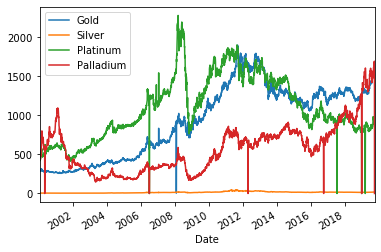

In [324]:
GP_data.plot( x="Date", y=["Gold", "Silver", "Platinum", "Palladium"]) 

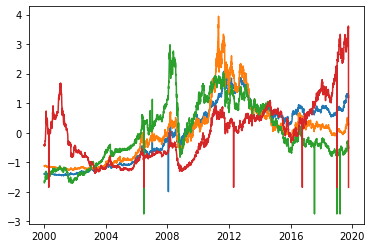

In [325]:
plt.plot(GP_data['Date'],(GP_data['Gold']-GP_data['Gold'].mean())/GP_data['Gold'].std())
plt.plot(GP_data['Date'],(GP_data['Silver']-GP_data['Silver'].mean())/GP_data['Silver'].std())
plt.plot(GP_data['Date'],(GP_data['Platinum']-GP_data['Platinum'].mean())/GP_data['Platinum'].std())
plt.plot(GP_data['Date'],(GP_data['Palladium']-GP_data['Palladium'].mean())/GP_data['Palladium'].std())

In [326]:
print("Number of days with Gold price <100: {}".format(len(GP_data[GP_data['Gold']<100])))
print("Number of days with Gold price ==0: {}".format(len(GP_data[GP_data['Gold']==0])))
print("Number of days with Silver price ==0: {}".format(len(GP_data[GP_data['Silver']==0])))
print("Number of days with Platinum price ==0: {}".format(len(GP_data[GP_data['Platinum']==0])))
print("Number of days with Palladium price ==0: {}".format(len(GP_data[GP_data['Palladium']==0])))

Number of days with Gold price <100: 1
Number of days with Gold price ==0: 0
Number of days with Silver price ==0: 0
Number of days with Platinum price ==0: 4
Number of days with Palladium price ==0: 6


In [327]:
# --- Fill zero Platinum entries with NaN (for forward filling in the subsequent steps)
gold_idx = GP_data[GP_data['Gold']<100].index.tolist()
print(GP_data.loc[gold_idx])
GP_data.loc[GP_data['Gold']<100, 'Gold'] = np.nan
print(GP_data.loc[gold_idx])

      index       date  Gold_AM  Gold_PM  Silver  Platinum_AM  Platinum_PM  \
2023   2242 2008-01-25     4.94      0.0   16.53       1649.0       1681.0   

      Palladium_AM  Palladium_PM       Date  Gold  Platinum  Palladium  
2023         381.0         380.5 2008-01-25  4.94    1681.0      381.0  
      index       date  Gold_AM  Gold_PM  Silver  Platinum_AM  Platinum_PM  \
2023   2242 2008-01-25     4.94      0.0   16.53       1649.0       1681.0   

      Palladium_AM  Palladium_PM       Date  Gold  Platinum  Palladium  
2023         381.0         380.5 2008-01-25   NaN    1681.0      381.0  


In [328]:
# --- Fill zero Platinum entries with NaN (for forward filling in the subsequent steps)
plat_idx = GP_data[GP_data['Platinum']==0].index.tolist()
print(GP_data.loc[plat_idx])
GP_data.loc[GP_data['Platinum']==0, 'Platinum'] = np.nan
print(GP_data.loc[plat_idx])

      index       date  Gold_AM  Gold_PM  Silver  Platinum_AM  Platinum_PM  \
1623   1636 2006-06-23   582.60   579.60  10.090          0.0          0.0   
4417   4396 2017-07-18  1237.10  1240.75  16.170          0.0          0.0   
4785   4533 2018-12-31  1281.65     0.00  15.465          0.0          0.0   
4839   4924 2019-03-18  1305.35  1305.60  15.380          0.0          0.0   

      Palladium_AM  Palladium_PM       Date     Gold  Platinum  Palladium  
1623           0.0           0.0 2006-06-23   582.60       0.0        0.0  
4417         862.0         867.0 2017-07-18  1240.75       0.0      867.0  
4785           0.0           0.0 2018-12-31  1281.65       0.0        0.0  
4839        1559.0        1567.0 2019-03-18  1305.60       0.0     1567.0  
      index       date  Gold_AM  Gold_PM  Silver  Platinum_AM  Platinum_PM  \
1623   1636 2006-06-23   582.60   579.60  10.090          0.0          0.0   
4417   4396 2017-07-18  1237.10  1240.75  16.170          0.0          0.

In [329]:
# --- Fill zero Palladium entries with Nan (for forward filling in the subsequent steps)
pallad_idx = GP_data[GP_data['Palladium']==0].index.tolist()
print(GP_data.loc[pallad_idx])
GP_data.loc[GP_data['Palladium']==0, 'Palladium'] = np.nan
print(GP_data.loc[pallad_idx])

      index       date  Gold_AM  Gold_PM  Silver  Platinum_AM  Platinum_PM  \
78      175 2000-04-21   279.85   279.85   5.095        488.0        487.0   
1623   1636 2006-06-23   582.60   579.60  10.090          0.0          0.0   
3092   3193 2012-04-19  1642.00  1650.00  31.470       1592.0       1574.0   
4218   4090 2016-10-03  1318.65  1313.30  19.180       1020.0       1013.0   
4785   4533 2018-12-31  1281.65     0.00  15.465          0.0          0.0   
4977   4786 2019-10-03  1504.00  1517.10  17.600        890.0        893.0   

      Palladium_AM  Palladium_PM       Date     Gold  Platinum  Palladium  
78             0.0           0.0 2000-04-21   279.85     488.0        0.0  
1623           0.0           0.0 2006-06-23   582.60       NaN        0.0  
3092           0.0           0.0 2012-04-19  1650.00    1592.0        0.0  
4218           0.0           0.0 2016-10-03  1318.65    1020.0        0.0  
4785           0.0           0.0 2018-12-31  1281.65       NaN        0.0

In [330]:
# --- Fill zero Palladium entries with Nan (for forward filling in the subsequent steps)
plat_idx = GP_data[GP_data['Platinum']==0].index.tolist()
print(GP_data.loc[plat_idx])
GP_data.loc[GP_data['Platinum']==0, 'Platinum'] = np.nan
print(GP_data.loc[plat_idx])

Empty DataFrame
Columns: [index, date, Gold_AM, Gold_PM, Silver, Platinum_AM, Platinum_PM, Palladium_AM, Palladium_PM, Date, Gold, Platinum, Palladium]
Index: []
Empty DataFrame
Columns: [index, date, Gold_AM, Gold_PM, Silver, Platinum_AM, Platinum_PM, Palladium_AM, Palladium_PM, Date, Gold, Platinum, Palladium]
Index: []


In [331]:
GP_data[['Gold', 'Silver', 'Platinum', 'Palladium']].describe()

,Gold,Silver,Platinum,Palladium
count,4977.000000,4978.000000,4974.000000,4972.000000
mean,931.543315,14.910770,1093.559761,573.464330
std,464.064185,8.566188,396.205832,309.042545
min,257.050000,4.065000,415.000000,150.000000
25%,424.300000,6.986250,831.000000,321.000000
50%,1071.000000,14.937500,998.000000,571.000000
75%,1292.000000,18.140000,1430.000000,761.000000
max,1896.500000,48.700000,2276.000000,1691.000000


In [339]:
GP_data.fillna(method='ffill', inplace=True)

In [340]:
GP_data[['Gold', 'Silver', 'Platinum', 'Palladium']].describe()

,Gold,Silver,Platinum,Palladium
count,4978.000000,4978.000000,4978.000000,4978.000000
mean,931.538837,14.910770,1093.434763,573.819938
std,464.017670,8.566188,396.096331,309.439741
min,257.050000,4.065000,415.000000,150.000000
25%,424.325000,6.986250,831.000000,321.000000
50%,1070.750000,14.937500,998.000000,571.000000
75%,1292.000000,18.140000,1429.750000,761.000000
max,1896.500000,48.700000,2276.000000,1691.000000


In [341]:
list_of_filled_rows = gold_idx + plat_idx + pallad_idx
GP_data.loc[list_of_filled_rows]
#print(list_of_filled_rows[2])

,index,date,Gold_AM,Gold_PM,Silver,Platinum_AM,Platinum_PM,Palladium_AM,Palladium_PM,Date,Gold,Platinum,Palladium
2023,2242,2008-01-25,4.94,0.00,16.530,1649.0,1681.0,381.0,380.5,2008-01-25,909.25,1681.0,381.0
78,175,2000-04-21,279.85,279.85,5.095,488.0,487.0,0.0,0.0,2000-04-21,279.85,488.0,565.0
1623,1636,2006-06-23,582.60,579.60,10.090,0.0,0.0,0.0,0.0,2006-06-23,582.60,1198.0,317.0
3092,3193,2012-04-19,1642.00,1650.00,31.470,1592.0,1574.0,0.0,0.0,2012-04-19,1650.00,1592.0,661.0
4218,4090,2016-10-03,1318.65,1313.30,19.180,1020.0,1013.0,0.0,0.0,2016-10-03,1318.65,1020.0,722.0
4785,4533,2018-12-31,1281.65,0.00,15.465,0.0,0.0,0.0,0.0,2018-12-31,1281.65,795.0,1270.0
4977,4786,2019-10-03,1504.00,1517.10,17.600,890.0,893.0,0.0,0.0,2019-10-03,1517.10,893.0,1676.0


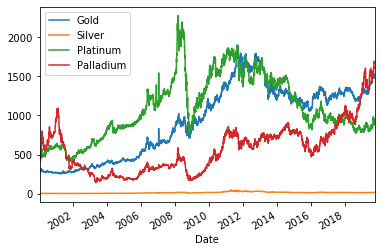

In [342]:
GP_data.plot( x="Date", y=["Gold", "Silver", "Platinum", "Palladium"]) 

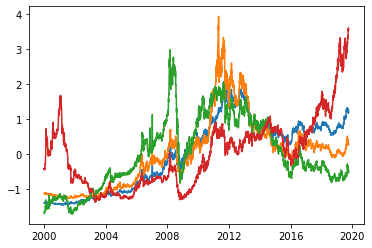

In [343]:
plt.plot(GP_data['Date'],(GP_data['Gold']-GP_data['Gold'].mean())/GP_data['Gold'].std())
plt.plot(GP_data['Date'],(GP_data['Silver']-GP_data['Silver'].mean())/GP_data['Silver'].std())
plt.plot(GP_data['Date'],(GP_data['Platinum']-GP_data['Platinum'].mean())/GP_data['Platinum'].std())
plt.plot(GP_data['Date'],(GP_data['Palladium']-GP_data['Palladium'].mean())/GP_data['Palladium'].std())

In [344]:
GP_data.to_csv("../Data/1_GP_processed_2000-2019.csv")

In [345]:
GP_data.head(20)

,index,date,Gold_AM,Gold_PM,Silver,Platinum_AM,Platinum_PM,Palladium_AM,Palladium_PM,Date,Gold,Platinum,Palladium
0,253,2000-01-04,282.05,282.05,5.3025,442.0,433.0,444.0,0.0,2000-01-04,282.05,442.0,444.0
1,252,2000-01-05,282.10,280.45,5.2850,431.0,438.0,438.0,433.0,2000-01-05,282.10,438.0,438.0
2,251,2000-01-06,280.35,279.40,5.1400,420.0,414.0,435.0,433.0,2000-01-06,280.35,420.0,435.0
3,250,2000-01-07,282.00,282.10,5.1350,416.0,418.0,433.0,438.0,2000-01-07,282.10,418.0,438.0
4,249,2000-01-10,281.70,281.60,5.1450,416.0,418.0,433.0,449.0,2000-01-10,281.70,418.0,449.0
5,248,2000-01-11,281.70,282.25,5.1550,420.0,420.0,450.0,448.0,2000-01-11,282.25,420.0,450.0
6,247,2000-01-12,282.25,282.25,5.1450,420.0,421.0,450.0,448.0,2000-01-12,282.25,421.0,450.0
7,246,2000-01-13,282.20,282.10,5.0900,422.0,423.0,440.5,440.0,2000-01-13,282.20,423.0,440.5
8,245,2000-01-14,284.15,283.30,5.0950,427.0,429.0,437.0,439.0,2000-01-14,284.15,429.0,439.0
9,244,2000-01-17,284.90,285.35,5.1250,432.0,433.0,440.0,438.0,2000-01-17,285.35,433.0,440.0


In [348]:
GP_data['Gold_next'] = GP_data['Gold'].shift(periods = -1)
GP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 14 columns):
index           4978 non-null int64
date            4978 non-null datetime64[ns]
Gold_AM         4978 non-null float64
Gold_PM         4978 non-null float64
Silver          4978 non-null float64
Platinum_AM     4978 non-null float64
Platinum_PM     4978 non-null float64
Palladium_AM    4978 non-null float64
Palladium_PM    4978 non-null float64
Date            4978 non-null datetime64[ns]
Gold            4978 non-null float64
Platinum        4978 non-null float64
Palladium       4978 non-null float64
Gold_next       4977 non-null float64
dtypes: datetime64[ns](2), float64(11), int64(1)
memory usage: 544.6 KB


In [186]:
files = ['1_GP_LondonFix_2000-2018.csv', '2_SP500_2000-2019_YF.csv', '3_DJI_2000-2019.csv', \
         '4_FTSE100_1997-2019.csv', '5_10-year-treasury-bond-rate-yield-chart.csv', \
         '6_fed-funds-rate-historical-chart.csv', '7_CPIAUCSL.csv', \
         '8_USDX_1971-2019.csv', '9_GCZ9Gold_Futures_Historical_Data.csv', '10_DCOILWTICO.csv']

SP500_tbl = pd.read_csv('../Data/'+files[1])
SP500_tbl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4964,2019-09-26,2985.729980,2987.280029,2963.709961,2977.620117,2977.620117,3077240000
4965,2019-09-27,2985.469971,2987.310059,2945.530029,2961.790039,2961.790039,3243650000
4966,2019-09-30,2967.070068,2983.850098,2967.070068,2976.739990,2976.739990,3247610000
4967,2019-10-01,2983.689941,2992.530029,2938.699951,2940.250000,2940.250000,3558040000


In [187]:
DJI_tbl = pd.read_csv('../Data/'+files[2])
DJI_tbl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
1,2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2,2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
3,2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
4,2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000
...,...,...,...,...,...,...,...
4964,2019-09-26,27004.109375,27015.070313,26803.839844,26891.119141,26891.119141,229180000
4965,2019-09-27,26987.259766,27012.539063,26715.820313,26820.250000,26820.250000,217780000
4966,2019-09-30,26852.330078,26998.859375,26852.330078,26916.830078,26916.830078,222680000
4967,2019-10-01,26962.539063,27046.210938,26562.220703,26573.039063,26573.039063,260110000
